In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from bz2 import BZ2File as bzopen
from json import loads, dumps, load
import time
import PythonMethods
import importlib
import simplejson
import Levenshtein
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict
from operator import itemgetter
import ijson
from itertools import groupby
import multiprocessing
from datetime import datetime
import random
#import dask.dataframe as dd

In [ ]:
PythonMethods.read_tweets()

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.id_sorting()

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.detect_samsa_accounts()

In [ ]:
importlib.reload(PythonMethods)
charList= PythonMethods.clean_samsa_text()

In [ ]:
importlib.reload(PythonMethods)
idFile = open("samsaUnfiltered.txt", "r")
idList = idFile.read().split(',')

idSamsa = [idTemp.strip() for idTemp in idList if idTemp != '']
samsaListFiltered = PythonMethods.filter_samsa_accounts(idSamsa, filtering=True)

with open("samsaListFiltered2.txt", "a") as samsaFile:
    simplejson.dump(samsaListFiltered, samsaFile)

    samsaFile.close()

In [ ]:
with open("samsaListFiltered2.txt", "r") as samsaFile:
    samsaFileList = samsaFile.read().replace('[', '').replace('"', '').split(',')
    samsaListFiltered = [samsa.strip() for samsa in samsaFileList]

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.clean_json_files('Aug 2018/')

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.filter_samsa_candidates(samsaListFiltered)

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.sort_samsa_candidates()

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.split_csv_file('samsaDigits/8.csv', 8)

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.split_csv_file('samsaDigits/9.csv', 9)

In [ ]:
importlib.reload(PythonMethods)
idCandidateList10 = PythonMethods.identify_image_modification('samsaDigits/9/9.csv')

In [ ]:
idCandidateList = [list(set(idSamsa['id'])) for idSamsa in idCandidateList10
                       if len(list(set(idSamsa['background_image']))) != 1 and len(list(set(idSamsa['profile_image']))) != 1]

In [ ]:
len(idCandidateList), len(idCandidateList10)

In [ ]:
with open('samsaDigits/9.txt', 'a') as f:
    for item in idCandidateList:
        f.write("%s\n" % item)

In [ ]:
importlib.reload(PythonMethods)
for dirpath, dirnames, filenames in os.walk('samsaDigits/9'):
    for file in filenames:
        filePath = os.path.join(dirpath, file)
        idCandidateList9 = PythonMethods.identify_image_modification(filePath)
        idCandidateList = [list(set(idSamsa['id'])) for idSamsa in idCandidateList9
                       if len(list(set(idSamsa['background_image']))) != 1 and len(list(set(idSamsa['profile_image']))) != 1]
        with open('samsaDigits/9.txt', 'a') as f:
            for item in idCandidateList:
                f.write("%s\n" % item)

In [ ]:
with open('samsaDigits/9.txt', 'r') as f1:
    listSamsa = []
    digits = [str(digit) for digit in np.arange(0, 10)]
    for idSamsa in f1:
        samsaCorrected = ''.join([char for char in idSamsa if char in digits])
        listSamsa.append(samsaCorrected)

In [ ]:
fileList = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']
pathList = ['samsaDigits/' + fileName for fileName in fileList]
lenTot = 0
for filePath in pathList:
    with open(filePath, 'r') as samsaFile:
        samsaList = [samsaID[1:-1] for samsaID in samsaFile]
        lenTot += len(samsaList)
        
print(lenTot)

In [ ]:
importlib.reload(PythonMethods)
levenshteinList, screenNameList = PythonMethods.samsa_candidates_statistics()

In [ ]:
levenshteinList[0:10]

In [ ]:
plt.hist(levenshteinList)
plt.title('Maximum Levenshtein edit distance with respect to number of users')
plt.savefig('levenshtein.png')

In [ ]:
screenNameList2 = [name for name in screenNameList if name < 10]

In [ ]:
plt.hist(screenNameList2)
plt.title('Number of screen names with respect to number of accounts')
plt.savefig('screenName.png')

In [ ]:
import random

samsaTrainingList = []
samsaList = []
fileList = ['1.txt', '9.txt']
pathList = ['samsaDigits/' + fileName for fileName in fileList]

### 1.txt
with open(pathList[0], 'r') as samsaDigit1:
    samsaList.extend([samsaID[1:-1] for samsaID in samsaDigit1 if str(samsaID[1:-1])[0:2] == '10'])
    print("FIle: ", len(samsaList))
    samsaTrainingList.extend(random.choices(population=samsaList, k=1200))


### 9.txt
digitList = ['94', '95', '96', '98', '99']
with open(pathList[1], 'r') as samsaDigit1:
    samsaList.extend([samsaID[1:-1] for samsaID in samsaDigit1 if str(samsaID[1:-1])[0:2] in digitList])
    print("FIle: ", len(samsaList))
    samsaTrainingList.extend(random.choices(population=samsaList, k=1200))


In [ ]:
importlib.reload(PythonMethods)
samsaTrainingList = PythonMethods.filter_language_candidates()

In [ ]:
samsaCount = Counter(samsaTrainingList)

In [ ]:
samsaTrainingList[0]

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.training_dataset_creation(samsaTrainingList)

In [ ]:
with open('samsaTrainingList.json', 'w') as samsaFile:
    simplejson.dump(samsaTrainingList, samsaFile)

In [ ]:
with open('samsaTrainingList.json', 'r') as samsaFile:
    samsaTrainingList = simplejson.load(samsaFile)

In [ ]:
samsaCountCandidates = [] # List used to store any Samsa candidate with at least five tweets
firstDigitList = [1, 9]
for firstDigit in firstDigitList:
    print("First Digit: ", firstDigit)
    for secondDigit in range(0, 10):
        for thirdDigit in range(0, 10):
            samsaListDigit = [samsaID for samsaID in samsaTrainingList if samsaID[0] == str(firstDigit) and samsaID[1] == str(secondDigit) and samsaID[2] == str(thirdDigit)]
            samsaCount = Counter(samsaListDigit)
            
            for samsaID, samsaVal in samsaCount.items():
                if samsaVal > 5 and samsaVal < 20:
                    samsaCountCandidates.append(samsaID)
            
            print("LEN: ", len(samsaCountCandidates))

In [ ]:
samsaTrainingList = random.choices(population=samsaCountCandidates, k=1000)

In [ ]:
with open('samsaCandidates.json', 'r') as samsaFile:
    samsaCountCandidates = simplejson.load(samsaFile)

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.remove_duplicate_tweets()

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.training_dataset_creation(samsaCountCandidates)

In [ ]:
tweetCount = 0

for dirpath, dirnames, filenames in os.walk('Annotation Dataset/'):
    for file in filenames:
        filePath = os.path.join(dirpath, file)
        with open(filePath, 'rb') as jsonFile:
            objects = ijson.items(jsonFile, 'item')
            tweets = (o for o in objects)
            print("Starting file: ", filePath)

            samsaTweets = [tweet for tweet in tweets]
            tweetCount += len(samsaTweets)

In [ ]:
importlib.reload(PythonMethods)
samsaTweets = PythonMethods.samsa_candidate_analysis()

In [ ]:
with open('samsaTrainingList.txt', 'w') as samsaFile:
    for samsaTraining in samsaTrainingList:
        samsaFile.write("%s \n" % samsaTraining)

In [ ]:
totalCount = len(fileTest)
trueCount = 0
placeCount = 0
geoCount = 0
coordCount = 0

for index, tweet in fileTest.iterrows():
    if tweet.user['geo_enabled'] == True:
        trueCount += 1
    
    if tweet.coordinates is not None:
        coordCount += 1
        
    if tweet.place is not None:
        placeCount += 1
        
    if tweet.geo is not None:
        geoCount += 1
        
print("Count: ", trueCount * 100 / totalCount, placeCount * 100 / totalCount, geoCount * 100 / totalCount,coordCount * 100 / totalCount)

In [ ]:
importlib.reload(PythonMethods)
PythonMethods.language_shift_detection()

In [2]:
trumpUpdatedPath = 'Tugrulcan Dataset/trump_users_updated.csv'
trumpPath = 'Tugrulcan Dataset/trump_users.csv'
yellowvestsUpdatedPath = 'Tugrulcan Dataset/gj_users_updated.csv'
yellowvestsPath = 'Tugrulcan Dataset/gj_users.csv'

In [ ]:
importlib.reload(PythonMethods)
idSamsaList, countSamsaList = PythonMethods.detect_samsa_candidates(yellowvestsPath, yellowvestsUpdatedPath)

In [3]:
with open('idSamsaList.json', 'r') as samsaFile:
    idSamsaList = simplejson.load(samsaFile)

In [ ]:
importlib.reload(PythonMethods)
samsaFeaturesList = PythonMethods.samsa_candidates_analysis(yellowvestsPath, yellowvestsUpdatedPath, idSamsaList)

In [4]:
with open('samsaFeaturesList.json', 'r') as featureFile:
    samsaFeaturesList = simplejson.load(featureFile)

Candi:  208 ['albertorangelly', 'luisalb38522434', 'JoJoPart2Best', 'TestAcc25737856', 'JacobTWillette', 'redhawkbadass13', 'HyunjinIsMyLove', 'U_MakeSKZ_Stay', 'ShiroSJLaPuenta', 'CaptainShibro']


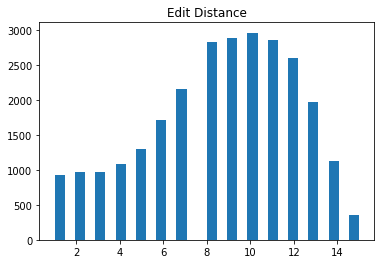

In [11]:
importlib.reload(PythonMethods)
PythonMethods.samsa_features_analysis(samsaFeaturesList, yellowvestsUpdatedPath)